In [12]:
#КОД 1 + ФИЛЬТР
import pandas as pd
import glob
files = glob.glob('1CDU/*/adj')

coord_df = pd.read_csv('GATC.fends', sep="\t")
coord_df['fend1'] = coord_df['fend']
out = open('1CDUinfo(%)filt.txt', 'a')
out.write('file' + '\t' + 'short_range_contacts' + '\t' + 'mitotic_contacts' + '\t' + 'trans_contacts' + '\n')

for file in files[:101]:
    print(file)
    read_df = pd.read_csv(file, sep="\t")
    s1 = pd.merge(read_df, coord_df, on='fend1', how='left')
    coord_df['fend2'] = coord_df['fend']    
    combo_df = pd.merge(s1, coord_df, on='fend2', how='left')
    del combo_df['fend1_x'], combo_df['fend2'], combo_df['fend1_y'], coord_df['fend2']
    
    all_cont = len(combo_df)
    #filter1
    if (all_cont > 20000) and (all_cont < 700000):
        trans_contacts = len(combo_df[combo_df["chr_x"] != combo_df["chr_y"]]) * 100 / all_cont
        #filter2
        if trans_contacts <= 15:
            combo_df = combo_df[combo_df["chr_x"] == combo_df["chr_y"]]
            combo_df["lengths"] = abs(combo_df["coord_x"] - combo_df["coord_y"]) + 1
            super_short = len(combo_df[combo_df["lengths"] <= 1000])  * 100 / all_cont
            #filter3
            if super_short <= 55:
                short_range_contacts = len(combo_df[combo_df["lengths"] <= 2000000])  * 100 / all_cont
                mitotic_contacts = len(combo_df[(combo_df["lengths"] < 12000000) & (combo_df["lengths"] > 2000000)])  * 100 / all_cont

                combo_df.to_csv(file + '_filt.txt', sep="\t")
                out.write(file + '\t' + str(short_range_contacts) + '\t' + str(mitotic_contacts) + '\t' + str(trans_contacts) + '\n') 
out.close()

1CDU\1CDU.1\adj
1CDU\1CDU.101\adj
1CDU\1CDU.102\adj
1CDU\1CDU.103\adj
1CDU\1CDU.104\adj
1CDU\1CDU.105\adj
1CDU\1CDU.106\adj
1CDU\1CDU.107\adj
1CDU\1CDU.11\adj
1CDU\1CDU.111\adj
1CDU\1CDU.113\adj
1CDU\1CDU.114\adj
1CDU\1CDU.115\adj
1CDU\1CDU.117\adj
1CDU\1CDU.118\adj
1CDU\1CDU.12\adj
1CDU\1CDU.121\adj
1CDU\1CDU.123\adj
1CDU\1CDU.126\adj
1CDU\1CDU.127\adj
1CDU\1CDU.128\adj
1CDU\1CDU.13\adj
1CDU\1CDU.131\adj
1CDU\1CDU.132\adj
1CDU\1CDU.133\adj
1CDU\1CDU.134\adj
1CDU\1CDU.135\adj
1CDU\1CDU.136\adj
1CDU\1CDU.137\adj
1CDU\1CDU.138\adj
1CDU\1CDU.14\adj
1CDU\1CDU.141\adj
1CDU\1CDU.142\adj
1CDU\1CDU.143\adj
1CDU\1CDU.144\adj
1CDU\1CDU.145\adj
1CDU\1CDU.146\adj
1CDU\1CDU.147\adj
1CDU\1CDU.148\adj
1CDU\1CDU.15\adj
1CDU\1CDU.151\adj
1CDU\1CDU.152\adj
1CDU\1CDU.153\adj
1CDU\1CDU.154\adj
1CDU\1CDU.155\adj
1CDU\1CDU.156\adj
1CDU\1CDU.157\adj
1CDU\1CDU.158\adj
1CDU\1CDU.16\adj
1CDU\1CDU.161\adj
1CDU\1CDU.162\adj
1CDU\1CDU.163\adj
1CDU\1CDU.164\adj
1CDU\1CDU.165\adj
1CDU\1CDU.166\adj
1CDU\1CDU.167\adj


In [45]:
#КОД 2 - определение фазы, имя архива встречается 4 раза
#выдает в эту же папку файл "АРХИВphase(%).txt",
#в каждую папку-клетку архива записывает файл adj_filt_bins.txt с числом контактов в каждом бине
#в папку архива записывает файлы "фаза.txt"
import pandas as pd
import glob
files = glob.glob('1CDES/*/adj_filt.txt')

out = open('1CDESphase(%).txt', 'a')
out.write('file' + '\t' + '% near' + '\t' + '% mitotic'+ '\t' + 'farAvgDist' + '\t' + 'cell phase'  + '\n')

bns = [1000* 2 ** (0.125 * n) for n in range(144)]
bins = dict()
for i in range(144):
    bins[i] = bns[i]
inbins = dict()
#bins 38-143 the valid bins
#% near - percentage of contacts in bins 38-89 out of all valid bins 
#% mitotic – percentage of contacts in bins 90-109 out of all valid bins
#Post-M % 𝑚𝑖𝑡𝑜𝑡𝑖𝑐 ≥ 30 ∧ % 𝑛𝑒𝑎𝑟 ≤ 50
#G1 %𝑛𝑒𝑎𝑟 ≤ 63
#Early to mid-S 63 < % 𝑛𝑒𝑎𝑟 ≤ 78.5
#Mid-S to G2 % 𝑛𝑒𝑎𝑟 > 78.5
#Pre-M % 𝑛𝑒𝑎𝑟 > 50 ∧ % 𝑛𝑒𝑎𝑟 + 1.8 × % 𝑚𝑖𝑡𝑜𝑡𝑖𝑐 > 100
for file in files:
    read_df = pd.read_csv(file, sep="\t")
    inbins[0] = len(read_df[(read_df['lengths'] < bins[0])])
    for i in range(1, 144):
        inbins[i] = len(read_df[(read_df['lengths'] < bins[i]) & (read_df['lengths'] > bins[i-1])])
        
    Bins = pd.DataFrame(inbins, index = [1])
    Bins.to_csv(file.split('.txt')[0] + '_bins' + '.txt', sep = '\t')
    
    valid_bins = sum(inbins[i] for i in range(38, 144))
    near = sum(inbins[i] for i in range(38, 90)) * 100 / valid_bins 
    mitotic = sum(inbins[i] for i in range(90, 110)) * 100 / valid_bins
    if near > 78.5:
        phase = 'Mid-S to G2'
    elif (near <= 50) and (mitotic >= 30):
        phase = 'Post-M'
    elif near <= 63:
        phase = 'G1'
    elif (near > 63) and (near <=78.5):
        phase = 'Early to mid-S'
    elif (near > 50) and (near + 1.8 * mitotic > 100):
        phase = 'Pre-M'
    
    f = read_df[read_df['lengths'] >= bins[98]]
    farA = f['lengths'].mean()

    out.write(file + '\t' + str(near) + '\t' + str(mitotic) + '\t' + str(farA) + '\t' + phase + '\n') 
out.close()

#по разным файлам разные фазы
phase_df = pd.read_csv('1CDESphase(%).txt', sep="\t")
grouped = phase_df.groupby('cell phase')
for name, group in grouped:
    group.to_csv('1CDES/' + name + '.txt', sep = '\t')

KeyboardInterrupt: 

In [44]:
#КОД 3 - объединения по фазам и сортировка, выдает в эту же папку файлы "фаза.txt" и "фаза_sorted.txt для Post-M, G1, Pre-M"
#имя архива не встречается
import pandas as pd
import glob

phases = ['Post-M', 'G1', 'Pre-M', 'Early to mid-S','Mid-S to G2']
#все в один файл
def phase_to_file(string):
    files = glob.glob('*/' + string + '.txt')
    result = pd.read_csv(files[0], sep="\t")
    for file in files[1:]:
        result = pd.concat([result, pd.read_csv(file, sep="\t")])
    return result

for i in phases:
    read = phase_to_file(i)
    del read['Unnamed: 0']
    read.to_csv(i + '.txt', sep = '\t')

#сортировка 
def sort(name):
    read = pd.read_csv(name + '.txt', sep="\t")
    if name == 'Post-M':
        read.sort_values(by = '% mitotic', inplace = True, ascending = False)
    elif name == 'Pre-M':
        read.sort_values(by = '% mitotic', inplace = True)
    elif name == 'G1':
        n_std = read['% near'].std()
        n_mean = read['% near'].mean()
        read['n_score'] = (read['% near'] - n_mean) / n_std
        
        far_std = read['farAvgDist'].std()
        far_mean = read['farAvgDist'].mean()
        read['far_score'] = (read['farAvgDist'] - far_mean) / far_std
        
        read['n_score + far_score'] = read['far_score'] + read['n_score']
        read.sort_values(by = 'n_score + far_score', inplace = True)
    del read['Unnamed: 0']
    return read.to_csv(name + '_sorted.txt', sep="\t")

for i in phases[:3]:
    sort(i)

['1CDES\\Post-M.txt']
['1CDES\\G1.txt', '1CDU\\G1.txt']
['1CDES\\Early to mid-S.txt', '1CDU\\Early to mid-S.txt']
['1CDES\\Mid-S to G2.txt', '1CDU\\Mid-S to G2.txt']


In [2]:
#КОД 1 (старая версия - без фильтра)
import pandas as pd
import glob
files = glob.glob('1CDES*/adj')

coord_df = pd.read_csv('GATC.fends', sep="\t")
coord_df['fend1'] = coord_df['fend']
out = open('1CDESinfo(%).txt', 'a')
out.write('file' + '\t' + 'short_range_contacts' + '\t' + 'mitotic_contacts' + '\t' + 'trans_contacts' + '\n')

for file in files:
    read_df = pd.read_csv(file, sep="\t")
    s1 = pd.merge(read_df, coord_df, on='fend1', how='left')
    coord_df['fend2'] = coord_df['fend']    
    combo_df = pd.merge(s1, coord_df, on='fend2', how='left')
    del combo_df['fend1_x'], combo_df['fend2'], combo_df['fend1_y'], coord_df['fend2']
    
    all_cont = len(combo_df)
    trans_contacts = len(combo_df[combo_df["chr_x"] != combo_df["chr_y"]]) * 100 / all_cont
    
    combo_df = combo_df[combo_df["chr_x"] == combo_df["chr_y"]]
    combo_df["lengths"] = abs(combo_df["coord_x"] - combo_df["coord_y"]) + 1
    short_range_contacts = len(combo_df[combo_df["lengths"] <= 2000000])  * 100 / all_cont
    mitotic_contacts = len(combo_df[(combo_df["lengths"] < 12000000) & (combo_df["lengths"] > 2000000)])  * 100 / all_cont

    combo_df.to_csv(file + '.txt', sep="\t")
    out.write(file + '\t' + str(short_range_contacts) + '\t' + str(mitotic_contacts) + '\t' + str(trans_contacts) + '\n') 
out.close()

In [5]:
import pandas as pd

coord_df = pd.read_csv('G1_sorted.txt', sep="\t")
binfiles = coord_df['file'].str.replace('.txt', '_bins.txt')
binfiles

0       1CDES\1CDES_p1.E6\adj_filt_bins.txt
1      1CDES\1CDES_p10.B4\adj_filt_bins.txt
2           1CDU\1CDU.103\adj_filt_bins.txt
3           1CDU\1CDU.187\adj_filt_bins.txt
4           1CDU\1CDU.133\adj_filt_bins.txt
5      1CDES\1CDES_p10.C3\adj_filt_bins.txt
6           1CDU\1CDU.147\adj_filt_bins.txt
7           1CDU\1CDU.165\adj_filt_bins.txt
8      1CDES\1CDES_p10.D8\adj_filt_bins.txt
9      1CDES\1CDES_p10.A8\adj_filt_bins.txt
10          1CDU\1CDU.158\adj_filt_bins.txt
11     1CDES\1CDES_p10.D1\adj_filt_bins.txt
12          1CDU\1CDU.173\adj_filt_bins.txt
13          1CDU\1CDU.115\adj_filt_bins.txt
14     1CDES\1CDES_p10.D3\adj_filt_bins.txt
15          1CDU\1CDU.214\adj_filt_bins.txt
16    1CDES\1CDES_p10.D10\adj_filt_bins.txt
17          1CDU\1CDU.192\adj_filt_bins.txt
18     1CDES\1CDES_p10.A1\adj_filt_bins.txt
19     1CDES\1CDES_p10.B8\adj_filt_bins.txt
20          1CDU\1CDU.156\adj_filt_bins.txt
21           1CDU\1CDU.12\adj_filt_bins.txt
22          1CDU\1CDU.201\adj_fi

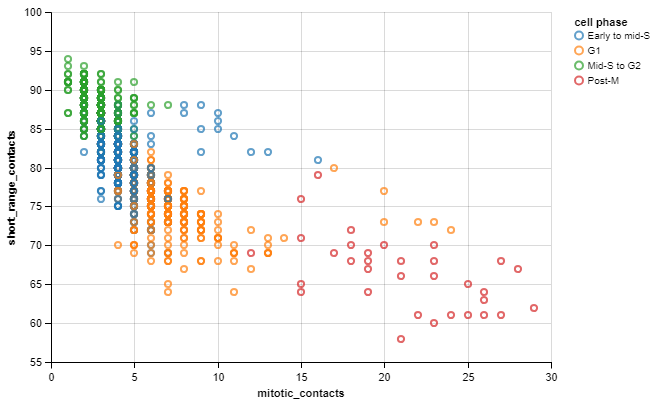

In [54]:
#ВИЗУАЛИЗАЦИЯ 1e
import altair as alt
import pandas as pd

arch = ['1CDX4', '1CDES', '1CDU', '1CDX3', '1CDX2', '1CDX1']

def phase_to_file(string):
    files = glob.glob('*/' + string + '.txt')
    result = pd.read_csv(files[0], sep="\t")
    for file in files[1:]:
        result = pd.concat([result, pd.read_csv(file, sep="\t")])
    return result

for file in arch:
    info = pd.read_csv(file + '/' + file +'info(%25)filt.txt', sep="\t")
    phase = pd.read_csv(file + '/' + file +'phase(%25).txt', sep="\t")
    phase['file'] = phase['file'].str.replace('_filt.txt', '')
    withphase_df = pd.merge(info, phase, on='file', how='left')
    withphase_df.to_csv(file + 'info_phase.txt', sep='\t')

for file in arch:
    file = file + 'info_phase.txt'
    result = pd.read_csv(file, sep="\t")

def info_phase_to_file(arch):
    files = [file + 'info_phase.txt' for file in arch]
    result = pd.read_csv(files[0], sep="\t")
    for file in files[1:]:
        result = pd.concat([result, pd.read_csv(file, sep="\t")])
    return result
info_phase_to_file(arch).to_csv('info_phase.txt', sep='\t')


info_phase = pd.read_csv('info_phase.txt', sep="\t")
alt.Chart(info_phase).mark_point().encode(
 alt.Y('short_range_contacts', scale=alt.Scale(domain=(55, 100))),
 x='mitotic_contacts',
 color='cell phase'
)
#alt.Chart.encode(y='short_range_contacts', scale=Scale(domain=[40, 100]))